In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


from sklearn.preprocessing import OrdinalEncoder ,OneHotEncoder

In [2]:
train = pd.read_csv('./customer_churn_dataset-training-master.csv')
test = pd.read_csv('./customer_churn_dataset-testing-master.csv')

In [3]:
print(f"Train Shape : {train.shape}")
print(f"Test Shape : {test.shape}")

Train Shape : (440833, 12)
Test Shape : (64374, 12)


In [4]:
# Concat Two DataFrames
df = pd.concat([train , test] , axis = 0)
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
df.drop('CustomerID' , axis = 1 , inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505207 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                505206 non-null  float64
 1   Gender             505206 non-null  object 
 2   Tenure             505206 non-null  float64
 3   Usage Frequency    505206 non-null  float64
 4   Support Calls      505206 non-null  float64
 5   Payment Delay      505206 non-null  float64
 6   Subscription Type  505206 non-null  object 
 7   Contract Length    505206 non-null  object 
 8   Total Spend        505206 non-null  float64
 9   Last Interaction   505206 non-null  float64
 10  Churn              505206 non-null  float64
dtypes: float64(8), object(3)
memory usage: 46.3+ MB


In [7]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [8]:
df.describe(include= 'object')

,Gender,Subscription Type,Contract Length
count,505206,505206,505206
unique,2,3,3
top,Male,Standard,Annual
freq,280273,170630,198608


In [9]:
df.dropna(inplace = True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
num_col = df.select_dtypes(include='number').columns
cat_col = df.select_dtypes(include='object').columns

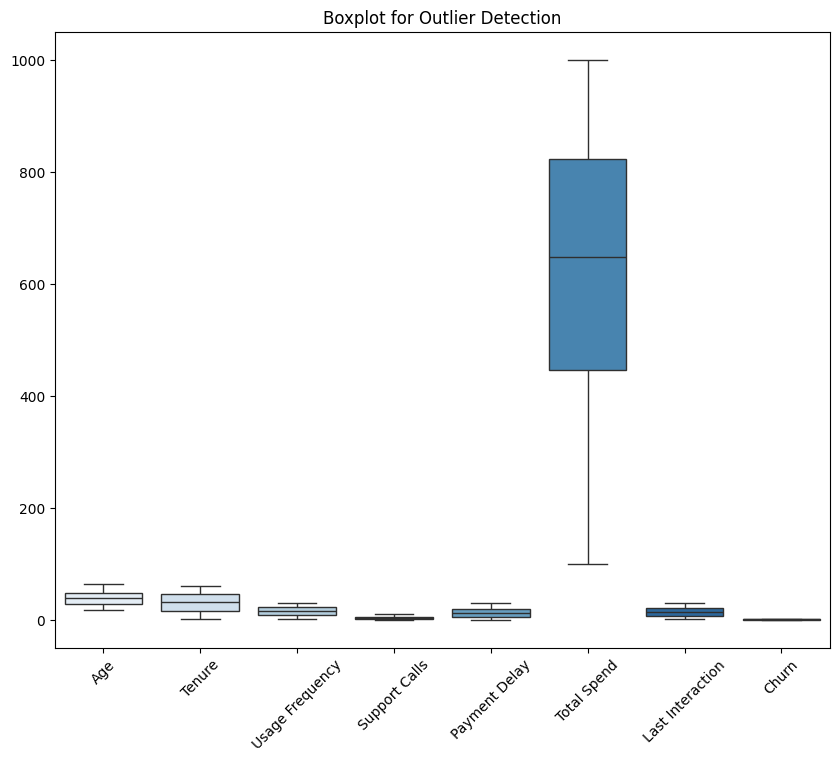

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[num_col] , palette='Blues')

plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation = 45)
plt.show()

In [13]:
df_encoded = df.copy()

ohe = OneHotEncoder(
    drop='first',
    sparse_output=False
)

gender_encoded = ohe.fit_transform(df_encoded[['Gender']])

gender_df = pd.DataFrame(
    gender_encoded,
    columns=ohe.get_feature_names_out(['Gender']),
    index=df_encoded.index
)

df_encoded = pd.concat([df_encoded.drop('Gender', axis=1), gender_df], axis=1)

In [14]:
ordinal_cols = ['Subscription Type', 'Contract Length']

oe = OrdinalEncoder(
    categories=[
        ['Basic', 'Standard', 'Premium'],        
        ['Monthly', 'Quarterly', 'Annual']       
    ]
)

df_encoded[ordinal_cols] = oe.fit_transform(df_encoded[ordinal_cols])

In [15]:
from sklearn.model_selection import train_test_split 

X = df_encoded.drop('Churn' , axis= 1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429425, 10)
(429425,)
(75781, 10)
(75781,)


In [16]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [17]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [18]:
# train_df.to_csv("train.csv", index=False)
# test_df.to_csv("test.csv", index=False)

# print("Train shape:", train_df.shape)
# print("Test shape:", test_df.shape)

In [19]:
train_df.columns

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Gender_Male', 'Churn'],
      dtype='object')

In [20]:
train_df.head(20)

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Gender_Male,Churn
0,34.0,7.0,3.0,4.0,14.0,1.0,1.0,639.00,27.0,1.0,1.0
1,24.0,9.0,24.0,0.0,4.0,0.0,1.0,933.61,13.0,1.0,0.0
2,41.0,58.0,17.0,4.0,16.0,2.0,1.0,958.95,15.0,1.0,0.0
3,38.0,32.0,5.0,0.0,6.0,1.0,1.0,708.95,27.0,1.0,0.0
4,28.0,52.0,13.0,6.0,17.0,2.0,2.0,388.00,11.0,0.0,1.0
5,47.0,35.0,10.0,3.0,19.0,0.0,2.0,951.74,15.0,1.0,0.0
6,18.0,12.0,14.0,2.0,1.0,2.0,1.0,839.00,14.0,1.0,1.0
7,28.0,32.0,30.0,1.0,15.0,2.0,2.0,829.53,16.0,1.0,0.0
8,27.0,25.0,8.0,1.0,23.0,2.0,0.0,583.00,15.0,1.0,1.0
9,23.0,37.0,10.0,5.0,22.0,2.0,1.0,273.84,12.0,1.0,1.0


In [21]:
test_df.head(20)

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Gender_Male,Churn
0,32.0,43.0,6.0,10.0,2.0,1.0,0.0,209.00,11.0,0.0,1.0
1,25.0,9.0,15.0,2.0,7.0,0.0,1.0,665.10,17.0,1.0,0.0
2,23.0,42.0,1.0,10.0,6.0,1.0,0.0,745.00,2.0,1.0,1.0
3,49.0,21.0,17.0,2.0,7.0,2.0,1.0,503.29,15.0,0.0,0.0
4,30.0,49.0,17.0,2.0,2.0,1.0,0.0,738.00,1.0,0.0,1.0
5,38.0,45.0,10.0,2.0,5.0,1.0,2.0,746.46,4.0,1.0,0.0
6,30.0,53.0,24.0,1.0,23.0,2.0,1.0,300.00,22.0,1.0,0.0
7,38.0,49.0,27.0,2.0,6.0,0.0,2.0,868.43,15.0,0.0,0.0
8,22.0,23.0,29.0,2.0,13.0,1.0,1.0,615.11,22.0,1.0,0.0
9,59.0,36.0,26.0,0.0,10.0,0.0,1.0,860.71,10.0,0.0,1.0
